# Data preprocessing

In [62]:
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
dataset_filename = 'training_set.npz'

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    directory_dataset = '/kaggle/input/blood-cells'
else:
    directory_dataset = '../data'
    if not os.path.exists(directory_dataset):
        os.makedirs(directory_dataset)
    if not os.path.exists(f'{directory_dataset}/{dataset_filename}'):
        url = "https://www.kaggle.com/datasets/camilosinning/blood-cells/download/d8yi67rTZ6HYsohjT9GN%2Fversions%2FFwagJNSFnqnnOYT5wDmO%2Ffiles%2Ftraining_set.npz?datasetVersionNumber=1"
        urllib.request.urlretrieve(url, directory_dataset)

In [64]:
dataset_path = f'{directory_dataset}/{dataset_filename}'

dataset = np.load(dataset_path,allow_pickle=True)
X = dataset['images']
y = dataset['labels']

In [65]:
X.shape, y.shape

((13759, 96, 96, 3), (13759, 1))

## Data exploration

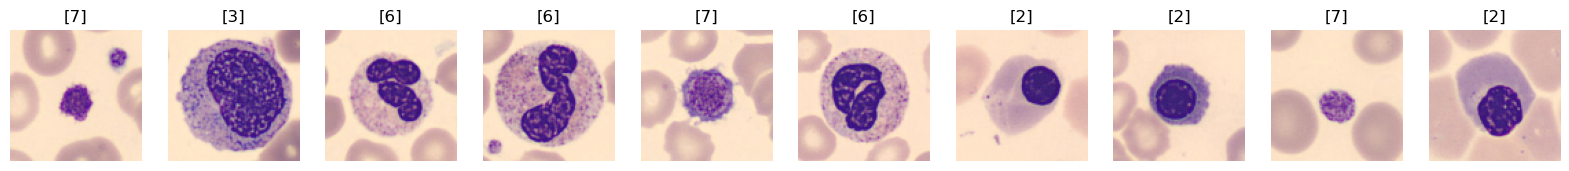

In [66]:
# See the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(X[i])
    axes[i].axis('off')
    axes[i].set_title(y[i])
plt.show()

In [67]:
# Print the unique values of the labels
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

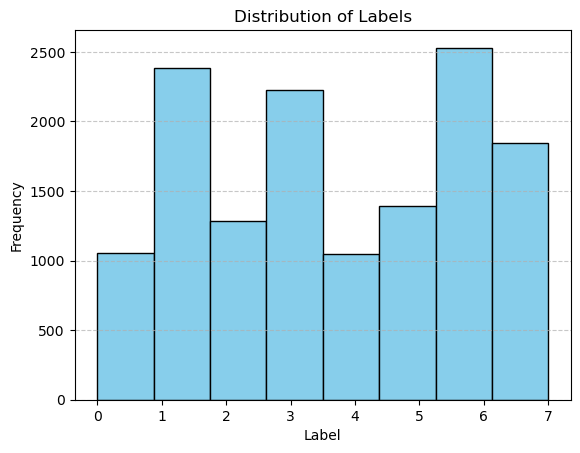

In [68]:
# Plot the distribution of the labels
plt.hist(y, bins=8, color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

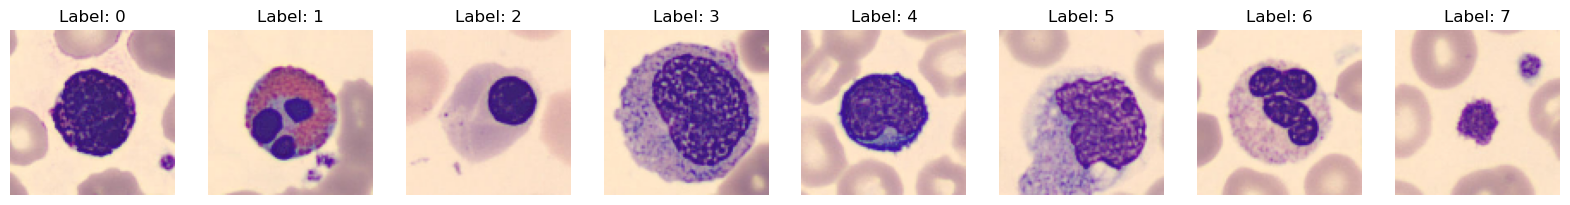

In [69]:
unique_labels = np.unique(y)
fig, axes = plt.subplots(1, len(unique_labels), figsize=(20, 5))

for i, label in enumerate(unique_labels):
    index = np.where(y == label)[0][0]
    axes[i].imshow(X[index])
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')

plt.show()

## Checking outliers

### PCA

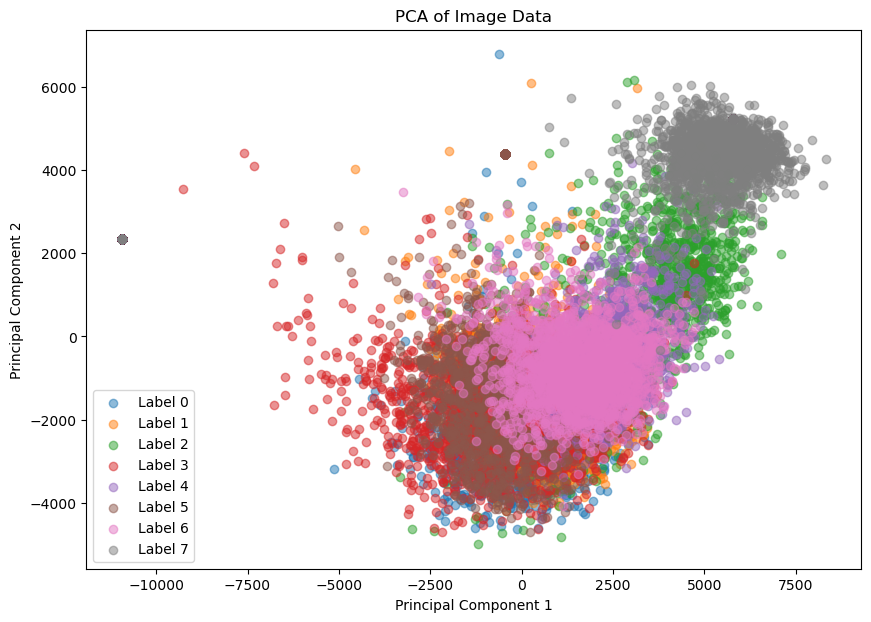

In [70]:
from sklearn.decomposition import PCA

# Flatten the images
X_flattened = X.reshape(X.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flattened)

# Plot the PCA results
plt.figure(figsize=(10, 7))
for label in unique_labels:
    indices = np.where(y == label)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Label {label}', alpha=0.5)

plt.title('PCA of Image Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Indices within the specified range: [0]
Indices within the specified range: [0]
Points within the specified range: [[5787.63436947 5230.99399744]]


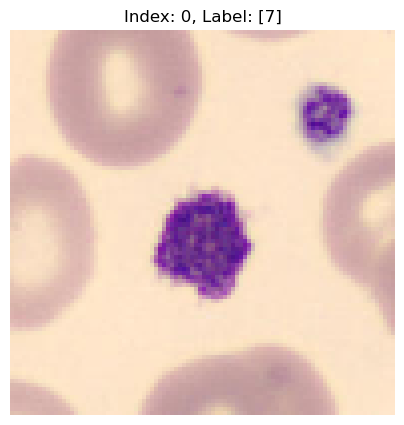

[7]


In [71]:
# Find the indices of points within the specified range
within_range_indices = np.where((X_pca[:, 0] >= 5785) & (X_pca[:, 0] <= 5790) & 
                                (X_pca[:, 1] >= 5220) & (X_pca[:, 1] <= 5240))[0]

print("Indices within the specified range:", within_range_indices)

# Print the indices and the corresponding points
print("Indices within the specified range:", within_range_indices)
print("Points within the specified range:", X_pca[within_range_indices])

# Plot the images associated with these points
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(X[within_range_indices[0]])
ax.axis('off')
ax.set_title(f'Index: {within_range_indices[0]}, Label: {y[within_range_indices[0]]}')
plt.show()

print(y[within_range_indices[0]])


In [72]:
# Count the number of images per unique label
label_counts = np.bincount(y.flatten())

# Sum the counts to verify the total number of images
total_images = label_counts.sum()

print("Label counts:", label_counts)
print("Total number of images:", total_images)
print("Total number of images in X:", X.shape[0])
assert total_images == X.shape[0], "The total count does not match the number of images in X"

Label counts: [1052 2381 1285 2226 1049 1393 2530 1843]
Total number of images: 13759
Total number of images in X: 13759


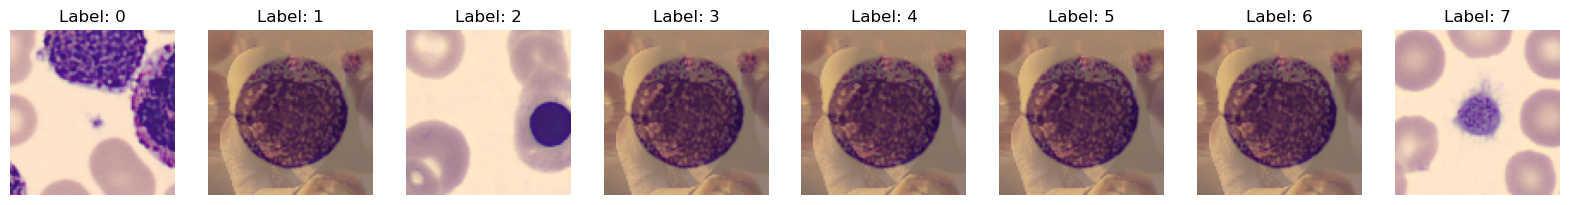

In [73]:
from sklearn.preprocessing import StandardScaler

# Normalize the PCA results
scaler = StandardScaler()
X_pca_normalized = scaler.fit_transform(X_pca)

# Calculate the distance from the origin for each point
distances = np.linalg.norm(X_pca_normalized, axis=1)

# Find the top 5 outliers for each label
outliers = {}
for label in unique_labels:
    label_indices = np.where(y == label)[0]
    label_distances = distances[label_indices]
    top_outliers = label_indices[np.argsort(label_distances)[-5:]]
    outliers[label] = top_outliers

# Plot the outliers
fig, axes = plt.subplots(1, len(unique_labels), figsize=(20, 5))
for i, label in enumerate(unique_labels):
    for idx in outliers[label]:
        axes[i].imshow(X[idx])
        axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')

plt.show()

SHERK!!?

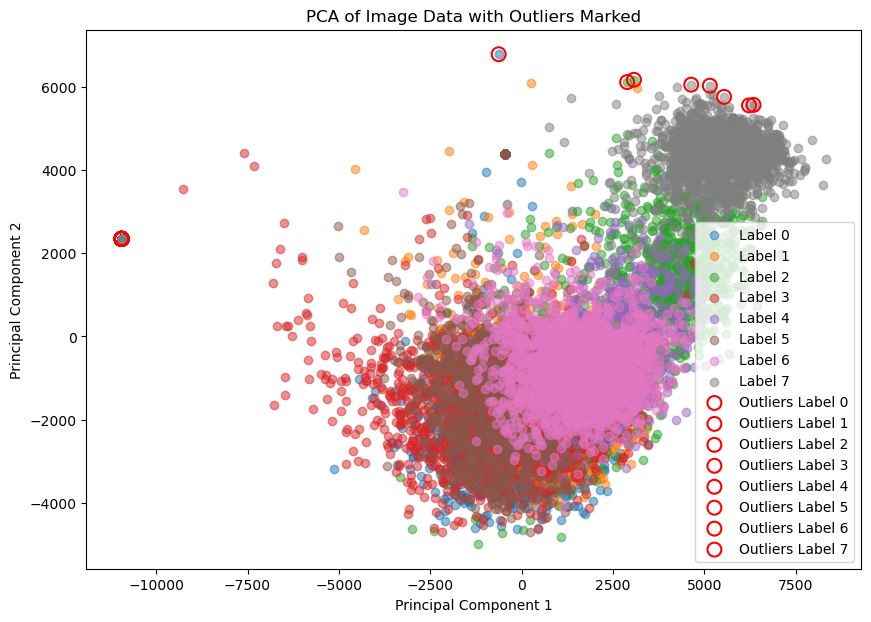

In [74]:
# Plot the PCA results with outliers marked
plt.figure(figsize=(10, 7))
for label in unique_labels:
    indices = np.where(y == label)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Label {label}', alpha=0.5)

# Mark the outliers
for label, outlier_indices in outliers.items():
    plt.scatter(X_pca[outlier_indices, 0], X_pca[outlier_indices, 1], edgecolor='red', facecolor='none', s=100, linewidth=1.5, label=f'Outliers Label {label}')

plt.title('PCA of Image Data with Outliers Marked')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Let's go more in detail

C:\Users\camil\AppData\Local\Temp\ipykernel_19148\2675653625.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


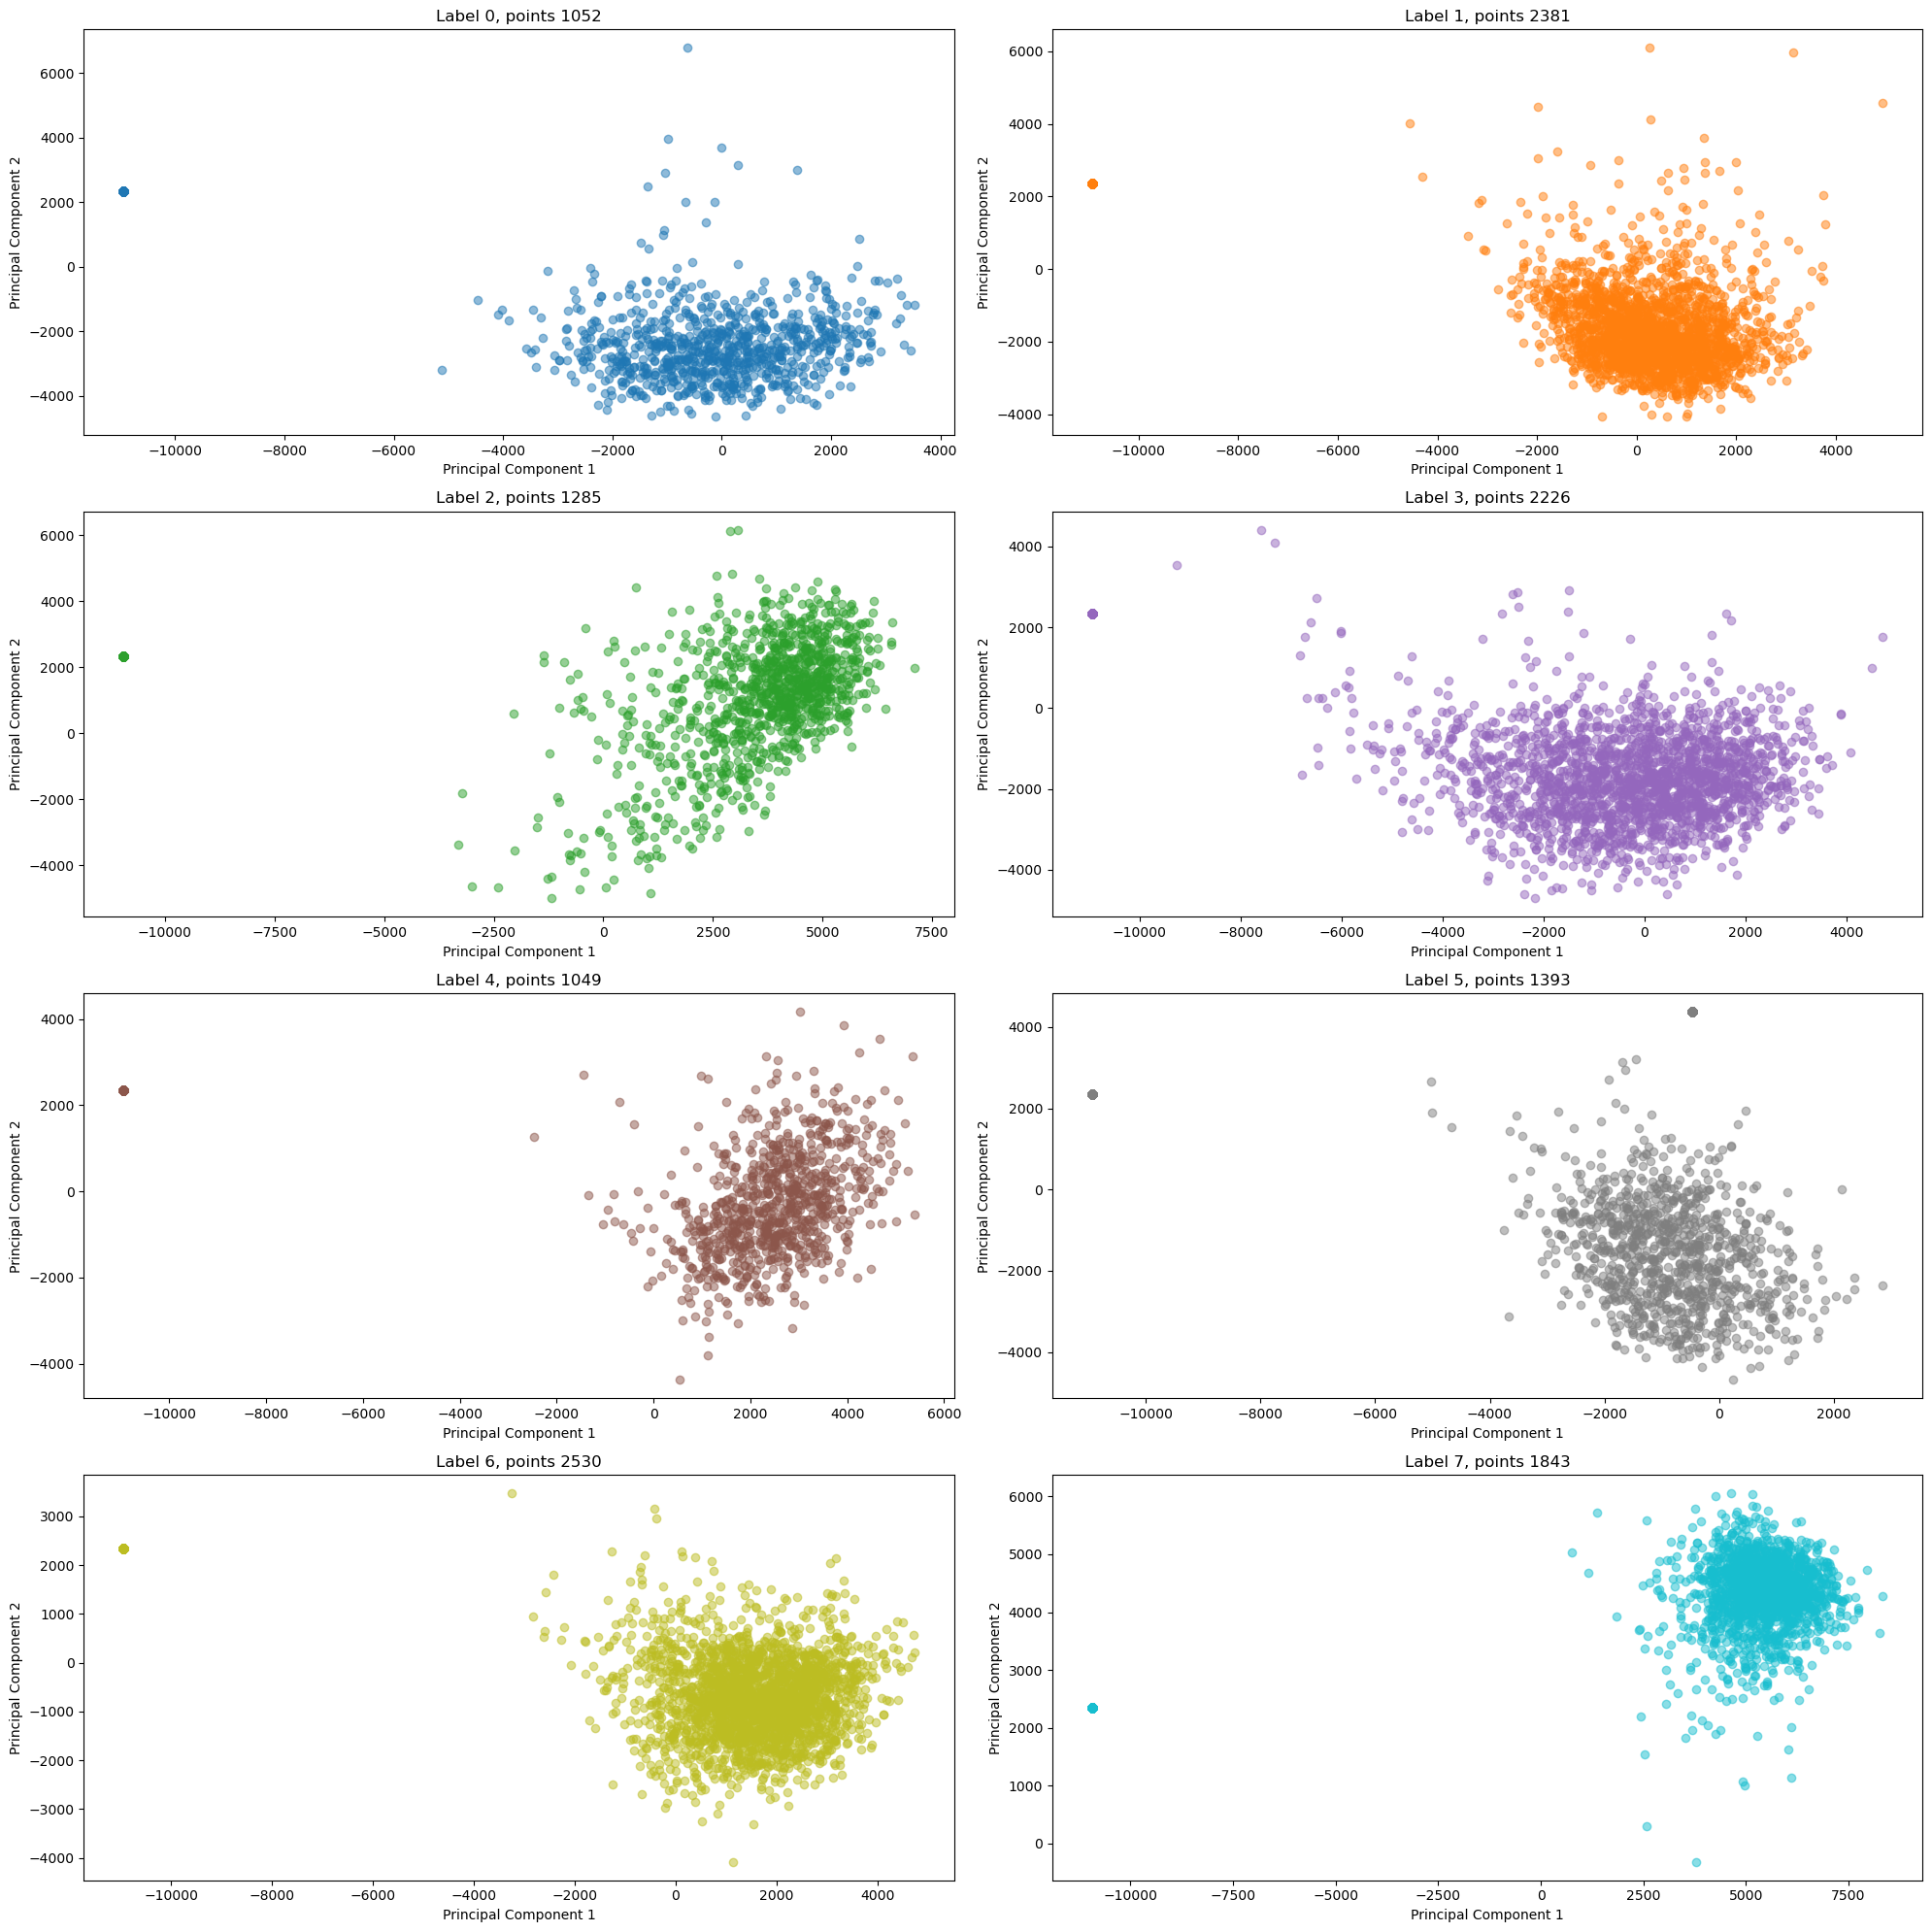

In [75]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    row, col = divmod(i, 2)
    indices = np.where(y == label)[0]  # Get the actual indices array
    axes[row, col].scatter(X_pca[indices, 0], X_pca[indices, 1], alpha=0.5, color=colors(i))
    axes[row, col].set_title(f'Label {label}, points {len(indices)}')
    axes[row, col].set_xlabel('Principal Component 1')
    axes[row, col].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Those dark dots look sus

In [78]:
from sklearn.cluster import DBSCAN

def dbscan_and_plot(label, X_pca, X, y, eps=0.5, min_samples=5):
    """
    Perform DBSCAN clustering and plot the results along with 10 images from the minority clusters.

    Parameters:
    label (int): The label to filter the data.
    X_pca (array-like): The PCA results of the input data.
    X (array-like): The input data.
    y (array-like): The labels for the data.
    eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.
    """
    
    # Filter the data based on the provided label
    label_indices = np.where(y == label)[0]
    X_label = X_pca[label_indices]

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit(X_label).labels_
    
    # Plot the scatter plot for label 0
    plt.figure(figsize=(10, 7))
    plt.scatter(X_label[:, 0], X_label[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f'DBSCAN Clustering for Label {label}, points {len(label_indices)}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Find the clusters except the one with the most elements
    unique, counts = np.unique(labels, return_counts=True)
    largest_cluster = unique[np.argmax(counts)]
    minority_clusters = unique[unique != largest_cluster]

    for cluster in minority_clusters:
        # Get the indices of images in the minority cluster
        cluster_indices = label_indices[labels == cluster]
        
        print(f'Number of images in cluster {cluster}: {len(cluster_indices)}')

        # Plot the first 10 images in the minority cluster in a 2x5 grid
        fig, axes = plt.subplots(2, 5, figsize=(20, 10))
        for i in range(min(10, len(cluster_indices))):
            row, col = divmod(i, 5)
            axes[row, col].imshow(X[cluster_indices[i]])
            axes[row, col].axis('off')
            axes[row, col].set_title(y[cluster_indices[i]])
        plt.show()

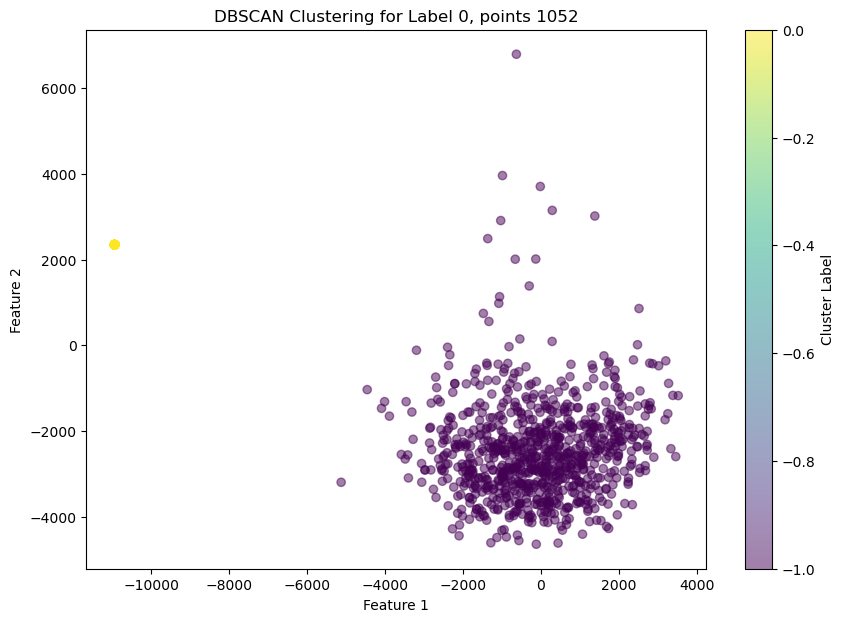

Number of images in cluster 0: 200


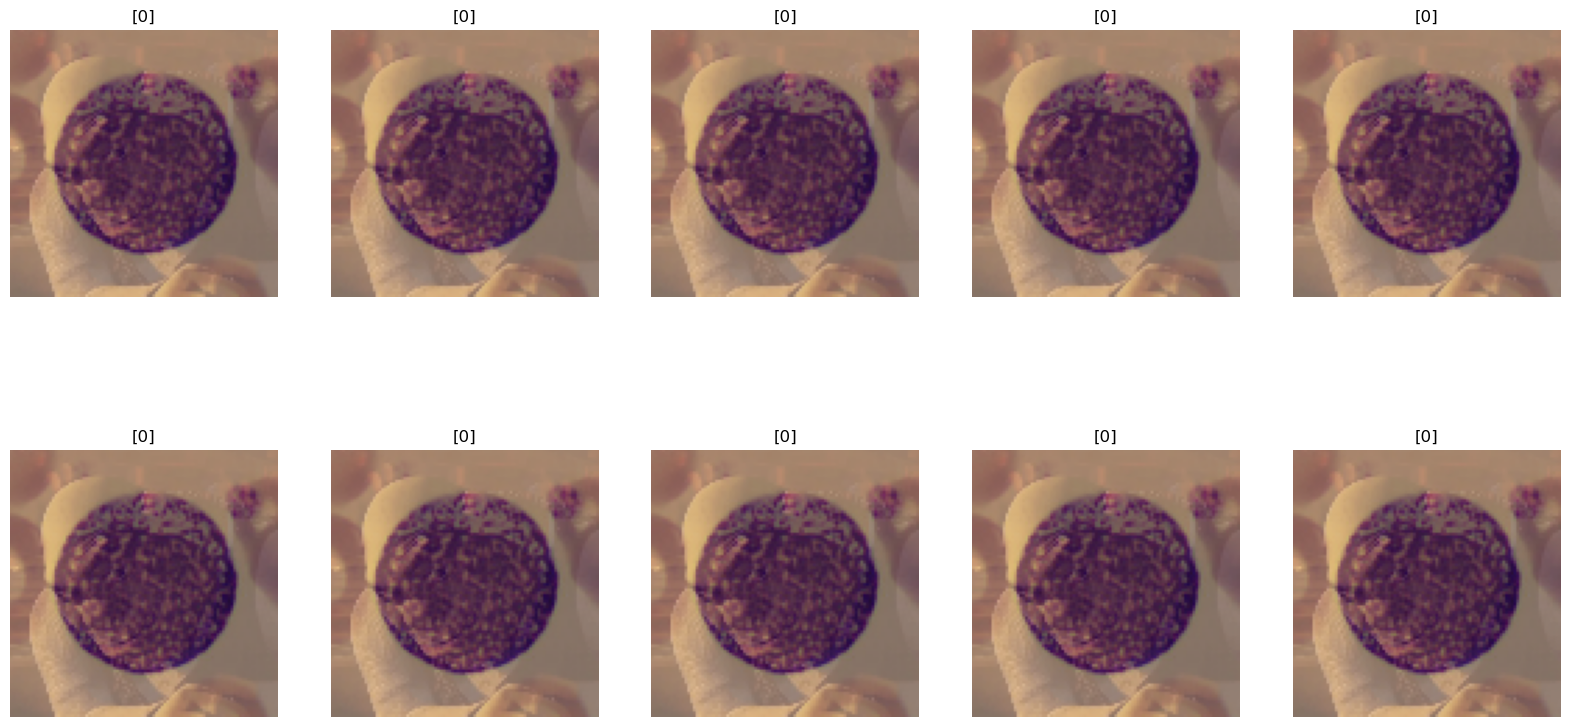

-------------------------------------------




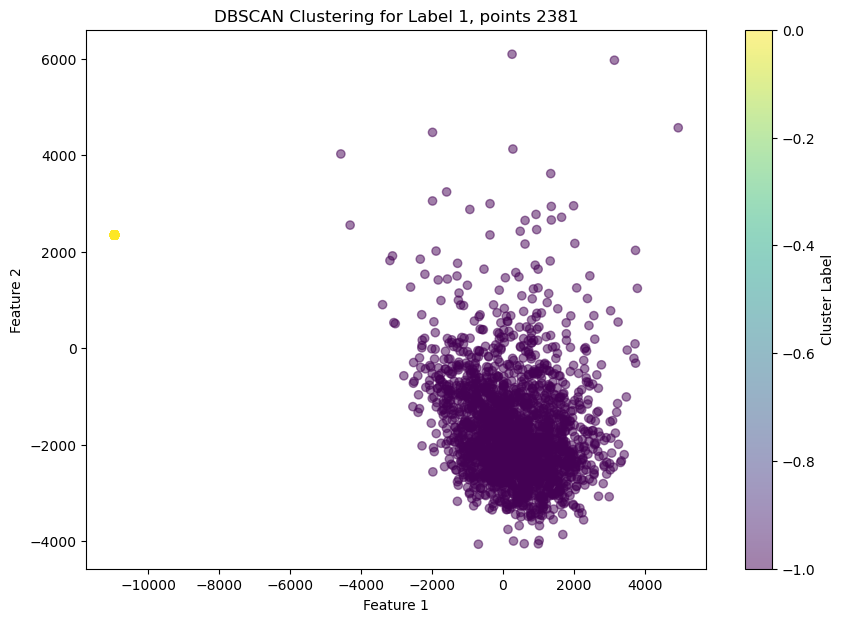

Number of images in cluster 0: 200


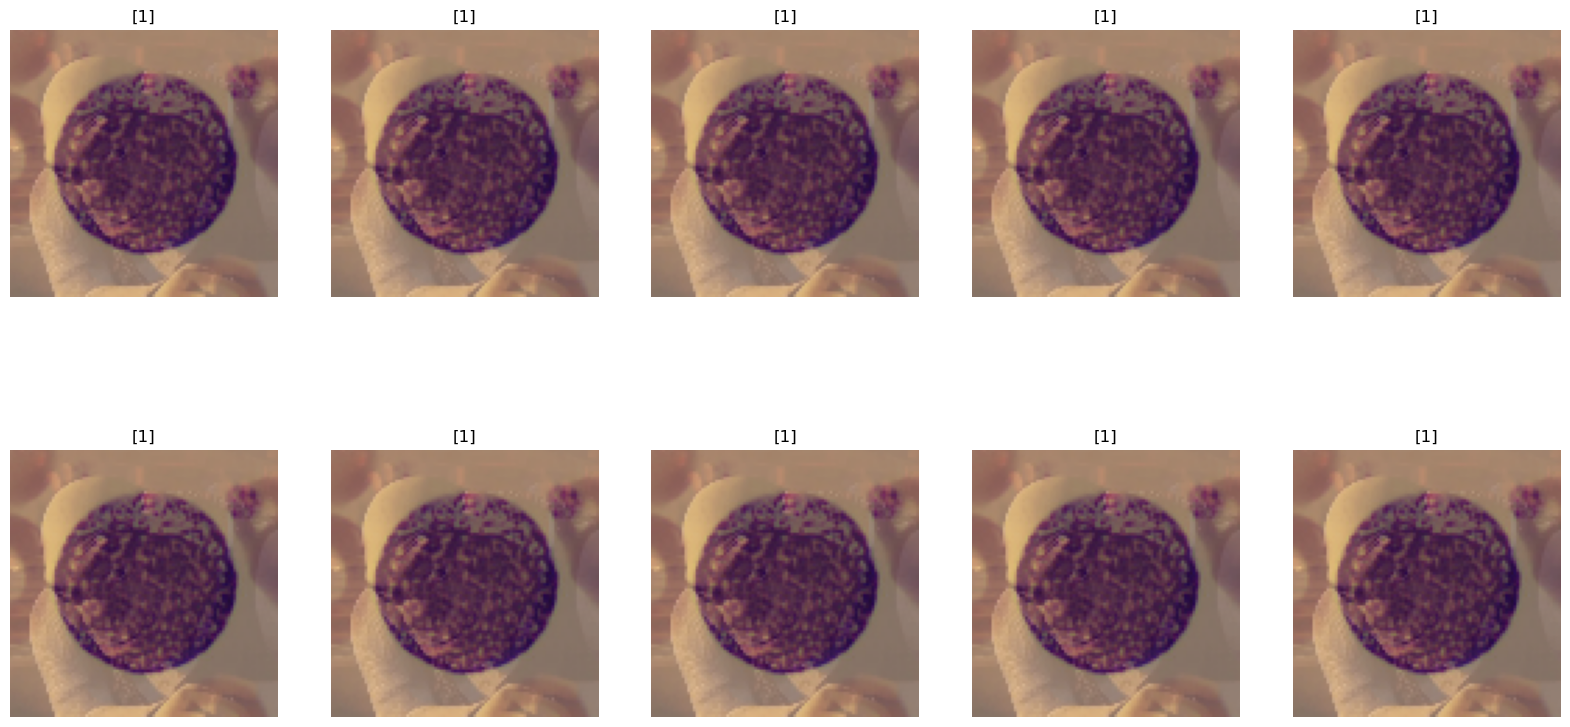

-------------------------------------------




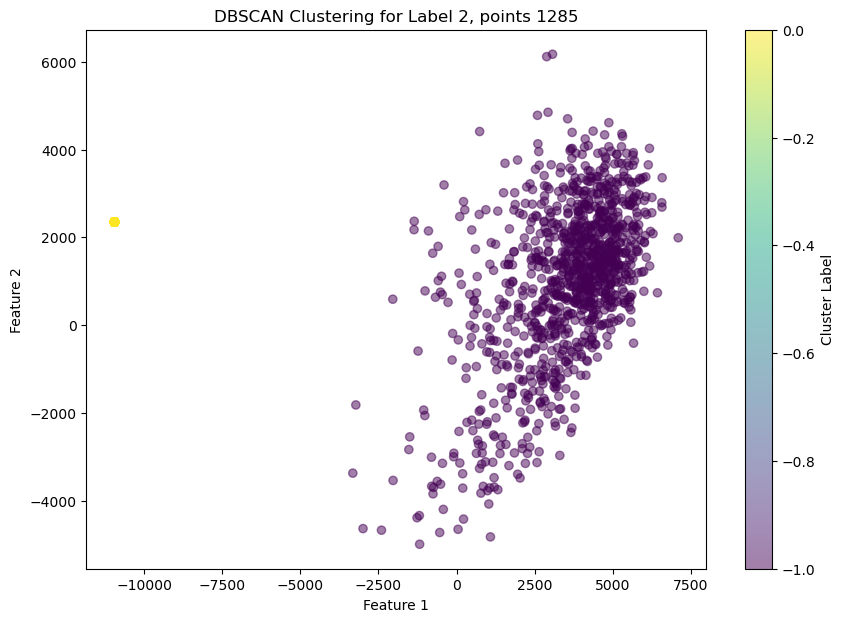

Number of images in cluster 0: 200


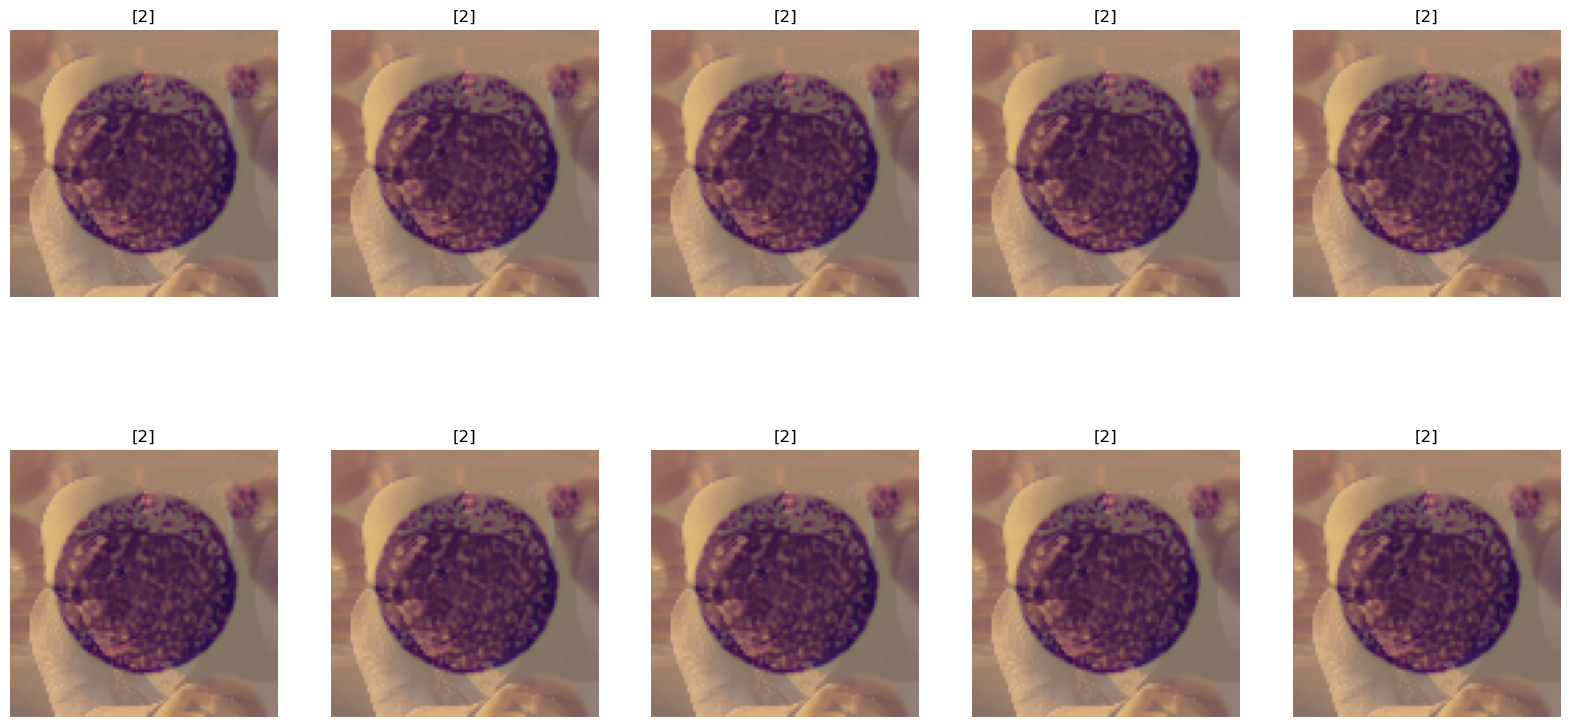

-------------------------------------------




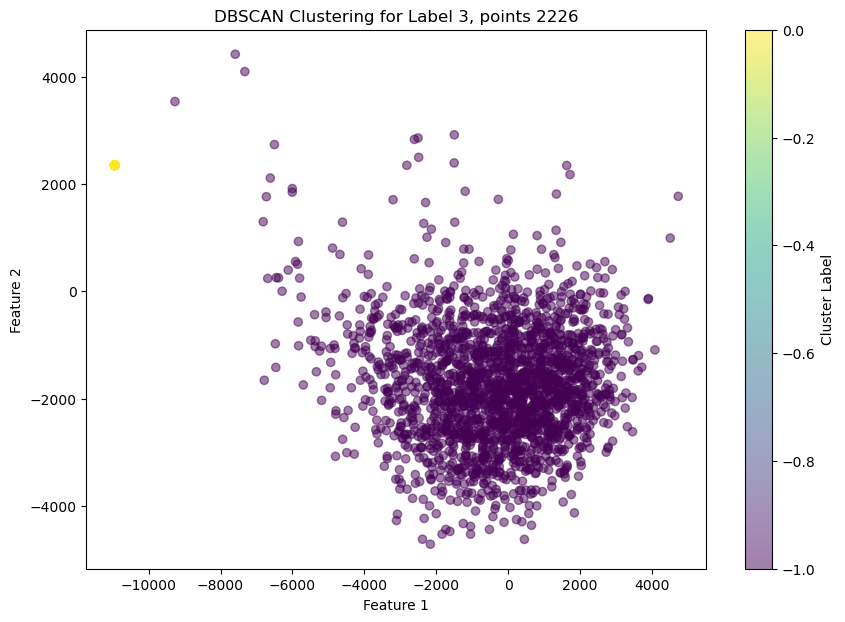

Number of images in cluster 0: 200


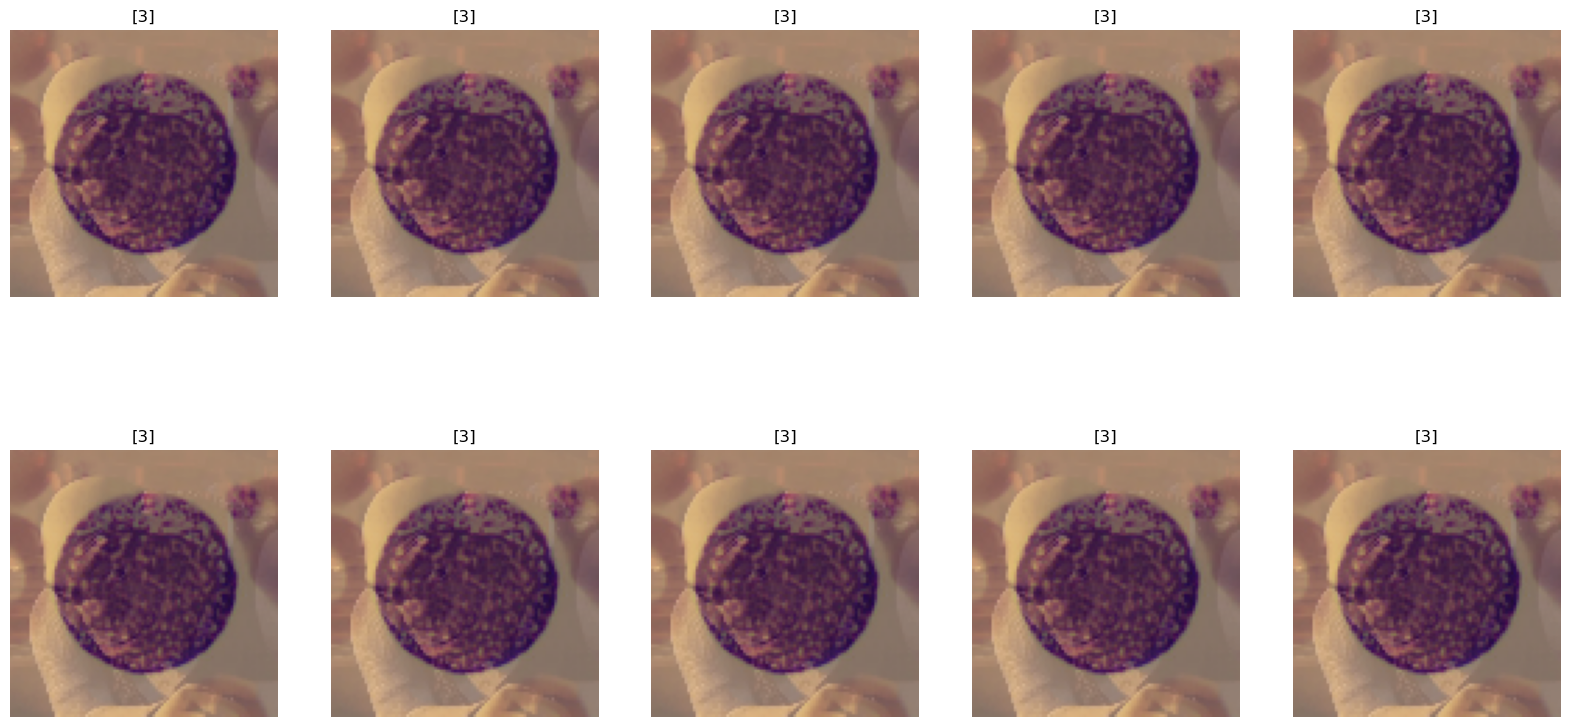

-------------------------------------------




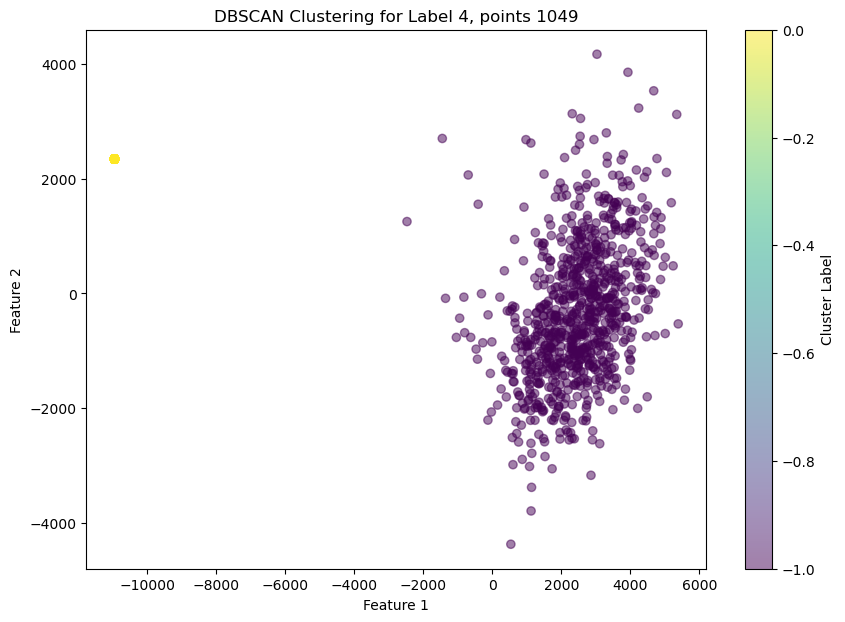

Number of images in cluster 0: 200


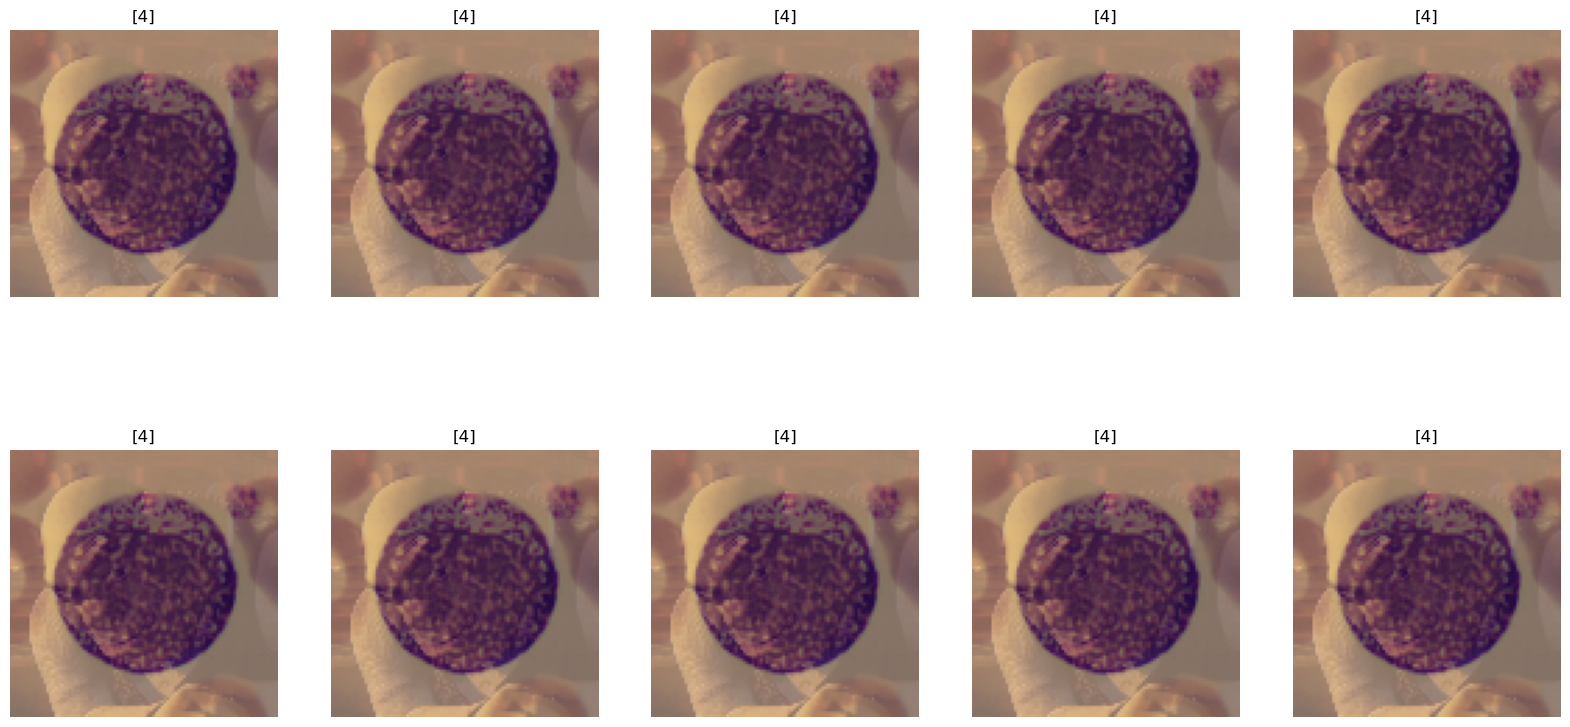

-------------------------------------------




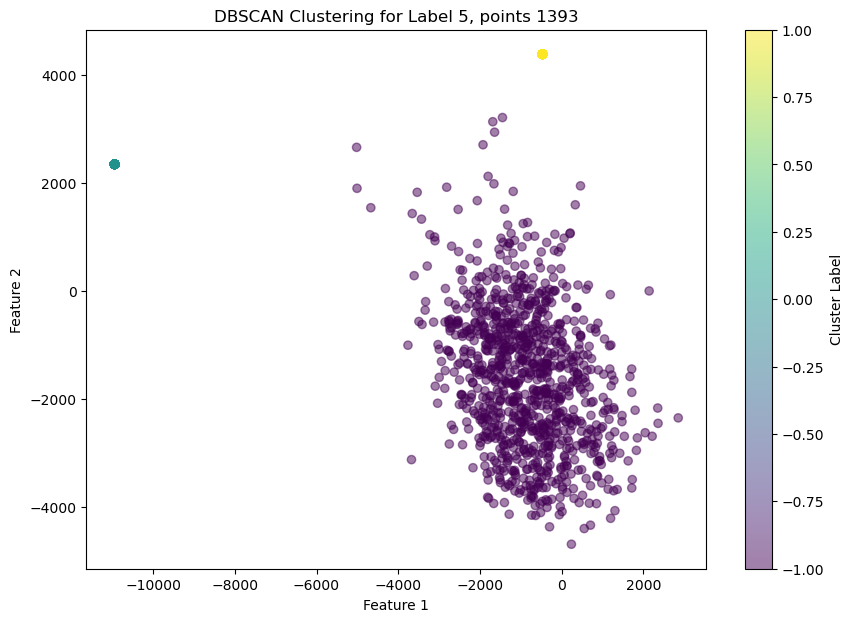

Number of images in cluster 0: 200


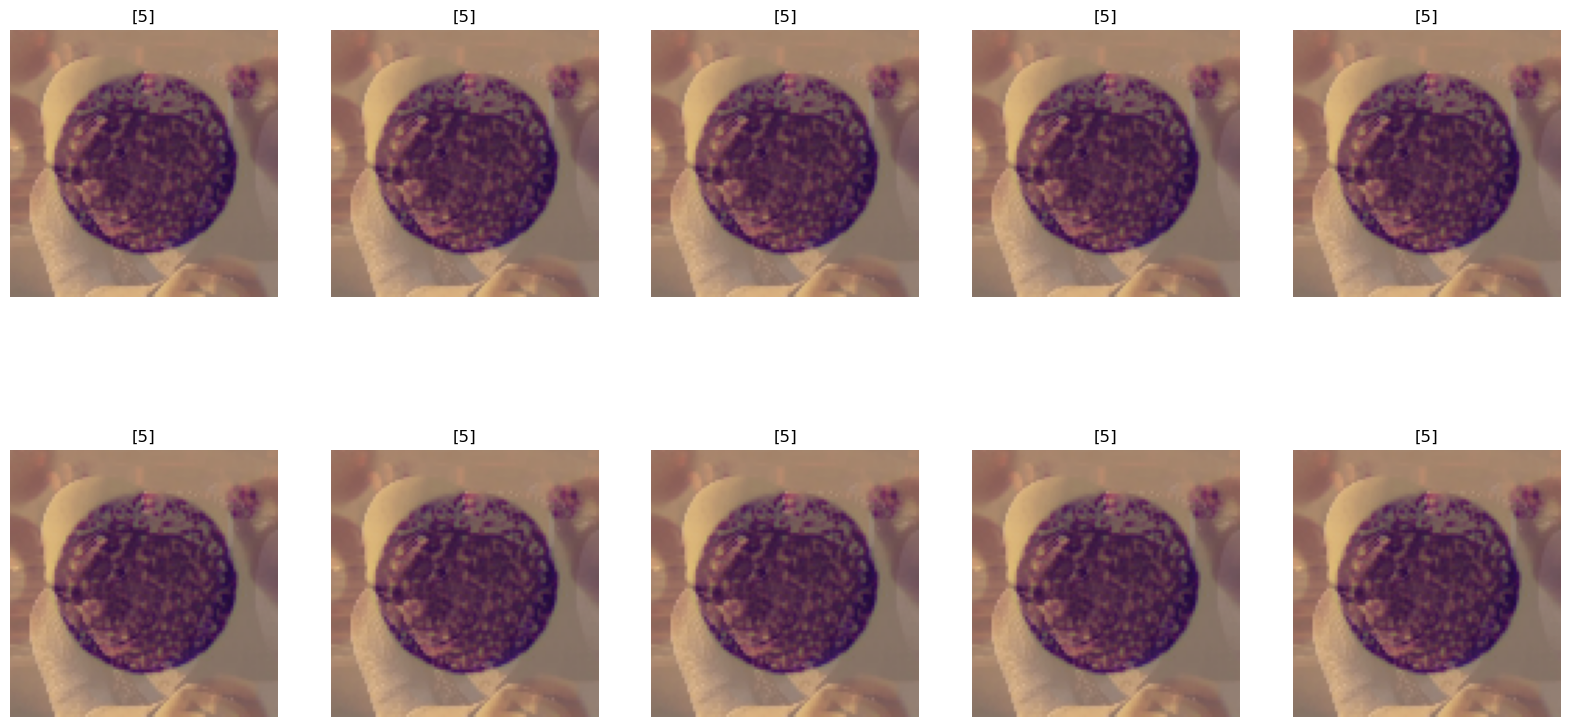

Number of images in cluster 1: 200


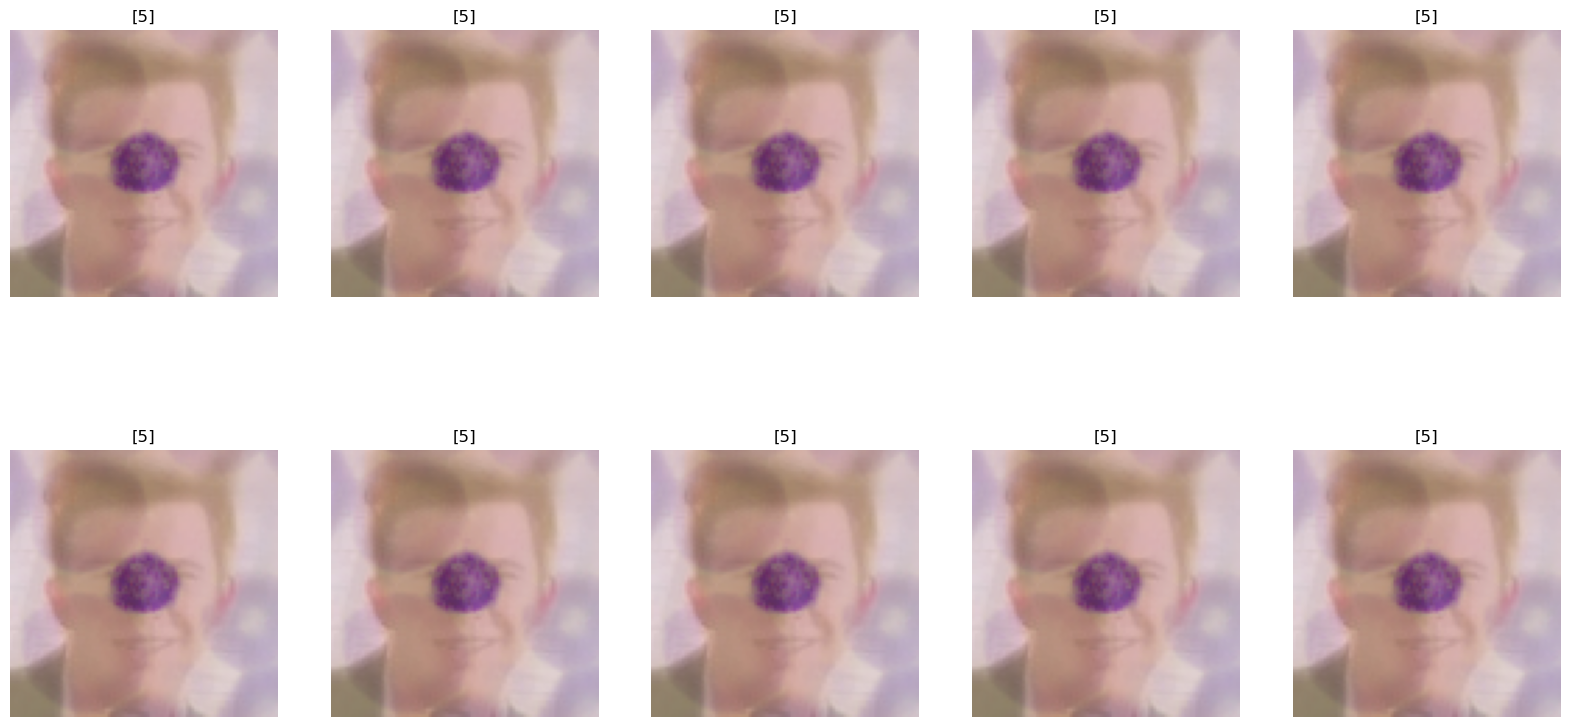

-------------------------------------------




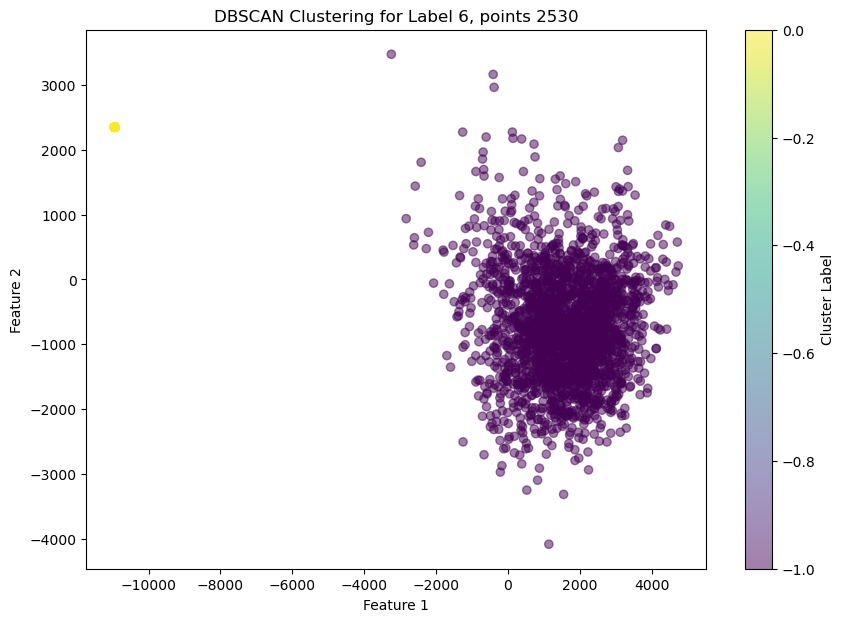

Number of images in cluster 0: 200


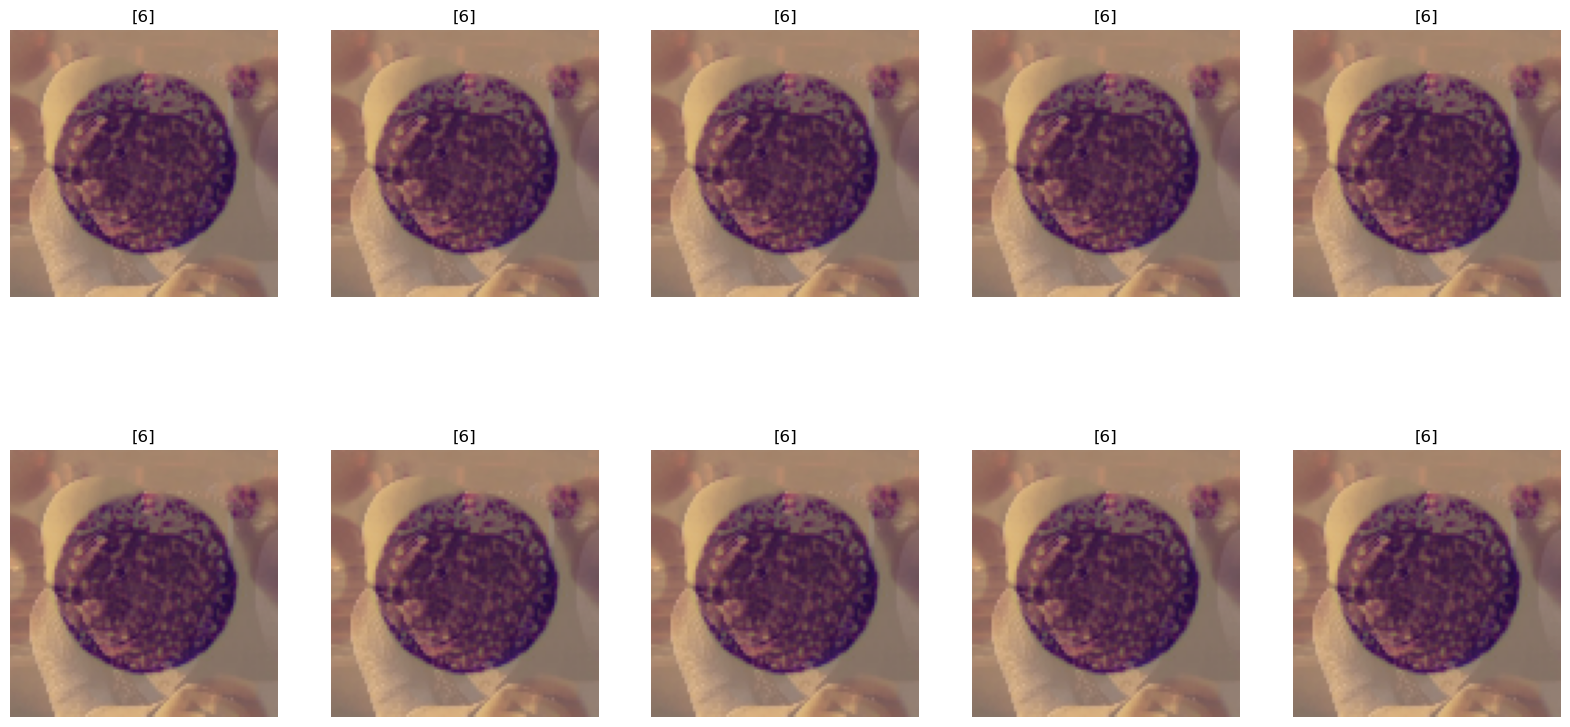

-------------------------------------------




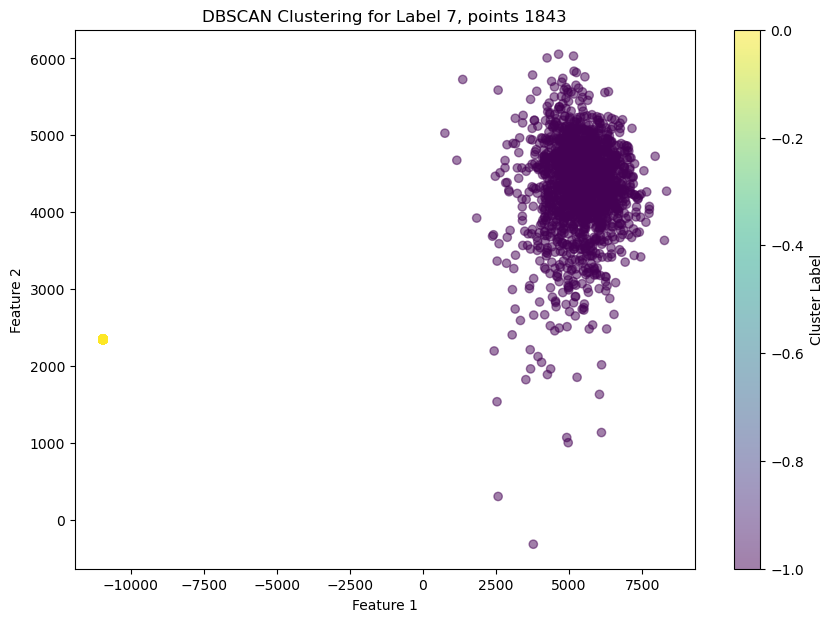

Number of images in cluster 0: 200


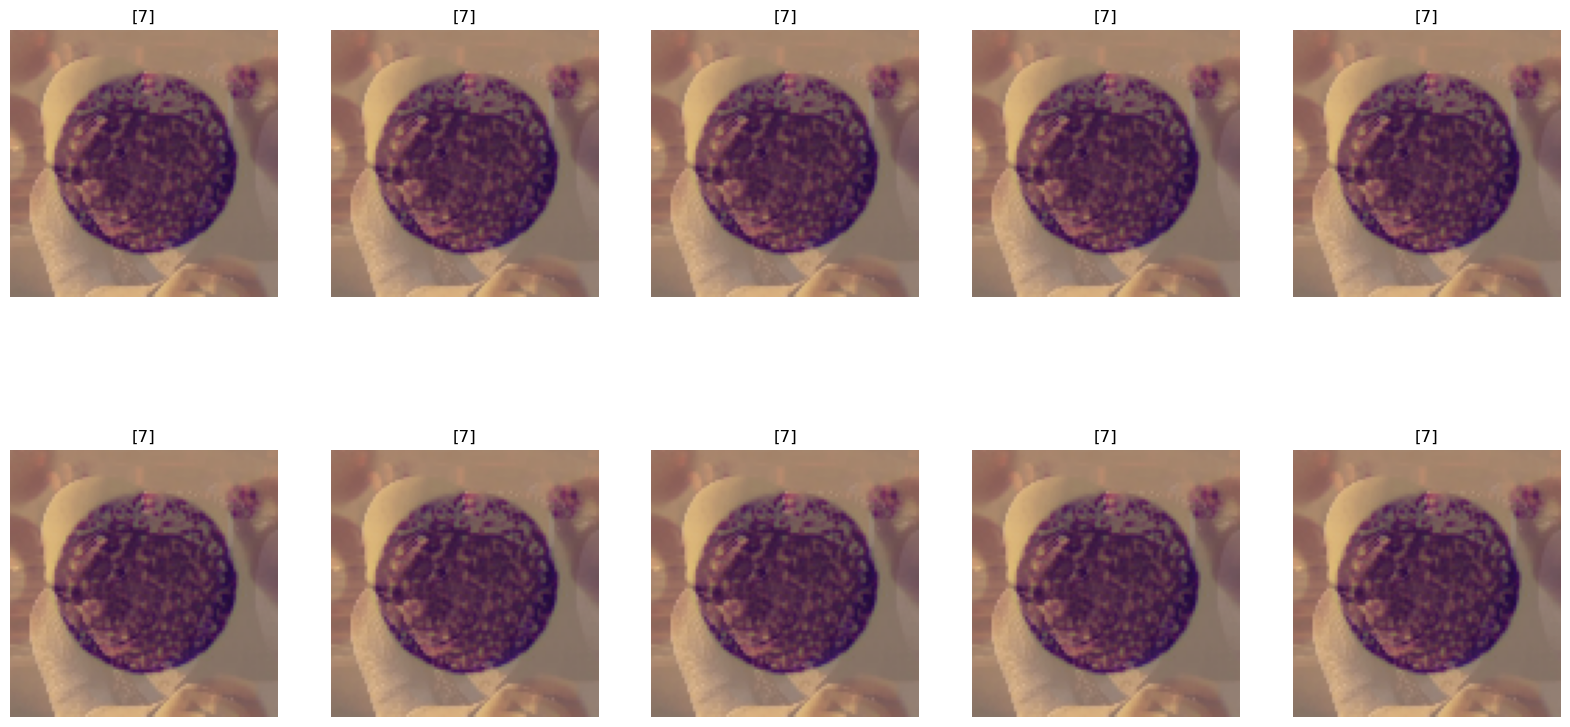

-------------------------------------------




In [79]:
for label in unique_labels:
    dbscan_and_plot(label, X_pca, X, y, eps=0.5, min_samples=5)
    print('-------------------------------------------')
    print('\n')

Rick roll!!!??